In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

/tmp/ipykernel_54398/680469946.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

 *Решение.*  
 
**1.** 

Мы минимизируем функцию $F(\theta) = \| Y - X\theta \|^2 = (Y-X\theta)^T(Y-X\theta) = Y^TY-2Y^TX\theta+\theta^TX^TX\theta$

$\nabla F = -2X^TY+2X^TX\theta = 0$

$\Rightarrow \widehat{\theta}  = (X^TX)^{-1}X^TY$
 
$X = \begin{pmatrix}
x_1 \\
... \\
x_n
\end{pmatrix} \quad Y = \begin{pmatrix}
Y_1 \\
... \\
Y_n
\end{pmatrix}$

$X^TX = \sum\limits_{i=1}^n x_i^2$

$X^TY = \sum\limits_{i=1}^n x_iY_i$

$\Rightarrow \widehat{\theta} = \frac{\sum\limits_{i=1}^n x_iY_i}{\sum\limits_{i=1}^n x_i^2}$

**2.**

*GD:* 

из предыдущего пункта $\nabla f(\theta) = 2X^T(X\theta - Y)$

итерация GD: $x_{t+1} = x_t - \eta \nabla f(x_t)$

$\Rightarrow \theta_{t+1} = \theta_t - \eta X^T(X\theta_t - Y) = \theta_t - \eta (\sum\limits_{i=1}^{n}x_i^2\theta_t - \sum\limits_{i=1}^{n}x_iY_i) = \theta_t - \eta\theta_t\sum\limits_{i=1}^{n}x_i^2 + \eta \sum\limits_{i=1}^{n}x_iY_i$

*SGD:*

в SGD мы вместо вычисления суммы на каждой итерации оцениваем ее по небольшому количеству слагаемых, поэтому получаем

$\theta_{t+1} = \theta_t - \eta \frac{n}{k}X_I^T(X_I\theta_t - Y_I) = \theta_t - \eta \frac{n}{k}\sum\limits_{i\in I}(x_i^2\theta_t-x_iY_i), \quad$ где $I = \{ i_1, ..., i_k \}, \quad$ причем $i_1, ..., i_k \sim U\{1, ..., n\}$

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

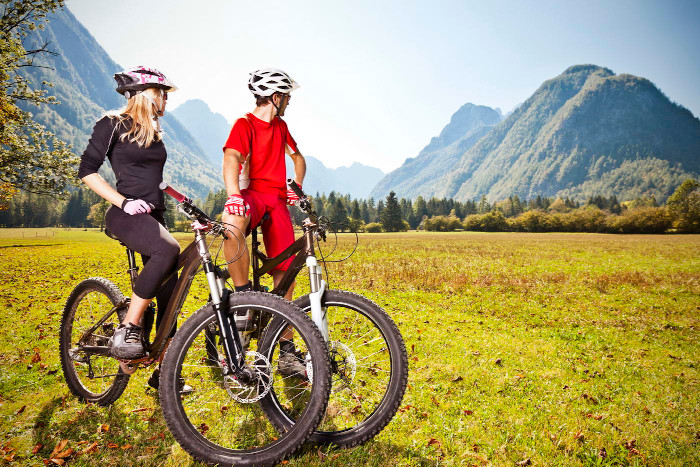

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
data = pd.read_csv('day.csv', parse_dates=[0])
data = data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
data.head()

/tmp/ipykernel_54398/1381246878.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('day.csv', parse_dates=[0])


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [5]:
data.shape

(731, 11)

In [6]:
train, test = train_test_split(data, test_size=0.2)

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

In [7]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] # категориальные 
real_features = ['temp', 'atemp', 'hum', 'windspeed'] # вещественные
target_feature = 'cnt'

Построим и сравним зависимости 'cnt' от признаков 'temp' и 'atemp', рассмотрев различные признаки в качестве разделения по hue:

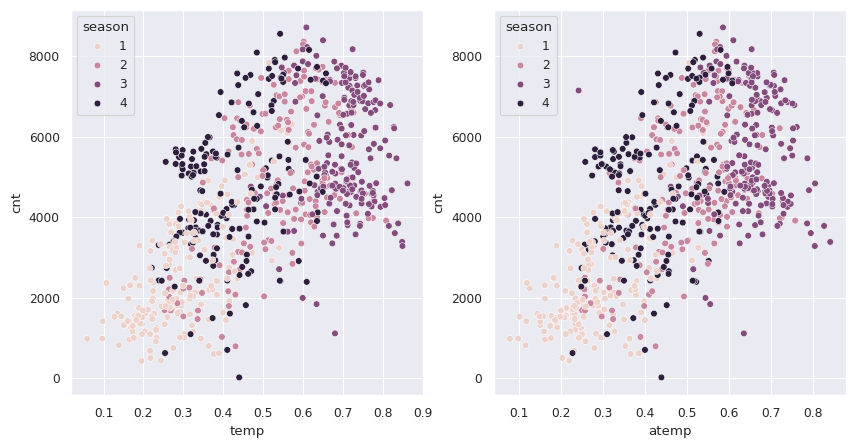

In [8]:
sns.set_context("paper", font_scale=1)
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
sns.scatterplot(data=data, x='temp', y=target_feature, hue="season", ax=axes[0])
sns.scatterplot(data=data, x='atemp', y=target_feature, hue="season", ax=axes[1])
plt.show()

/tmp/ipykernel_54398/4153469444.py:6: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=data, x='temp', y=target_feature, hue="weathersit", palette=custom_palette, ax=axes[0])
/tmp/ipykernel_54398/4153469444.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=data, x='atemp', y=target_feature, hue="weathersit", palette=custom_palette, ax=axes[1])


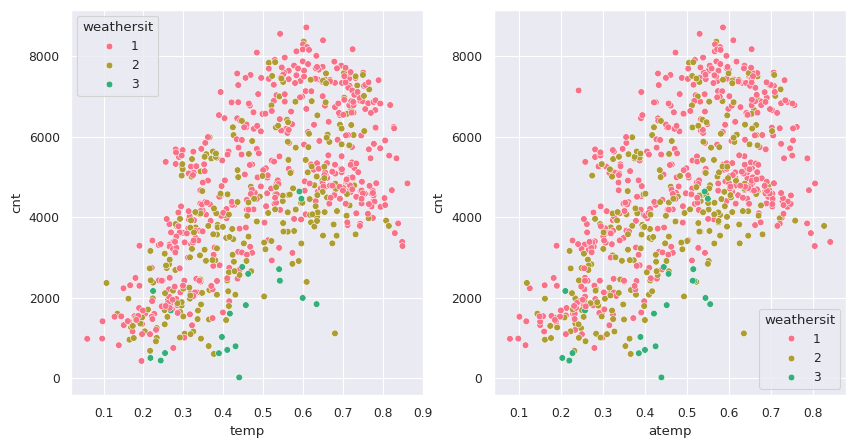

In [9]:
sns.set_context("paper", font_scale=1)
sns.set_style("darkgrid")

custom_palette = sns.color_palette("husl", 5)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
sns.scatterplot(data=data, x='temp', y=target_feature, hue="weathersit", palette=custom_palette, ax=axes[0])
sns.scatterplot(data=data, x='atemp', y=target_feature, hue="weathersit", palette=custom_palette, ax=axes[1])
plt.show()

/tmp/ipykernel_54398/3684880114.py:6: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=data, x='temp', y=target_feature, hue="weekday", palette=custom_palette, ax=axes[0])
/tmp/ipykernel_54398/3684880114.py:7: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=data, x='atemp', y=target_feature, hue="weekday", palette=custom_palette, ax=axes[1])


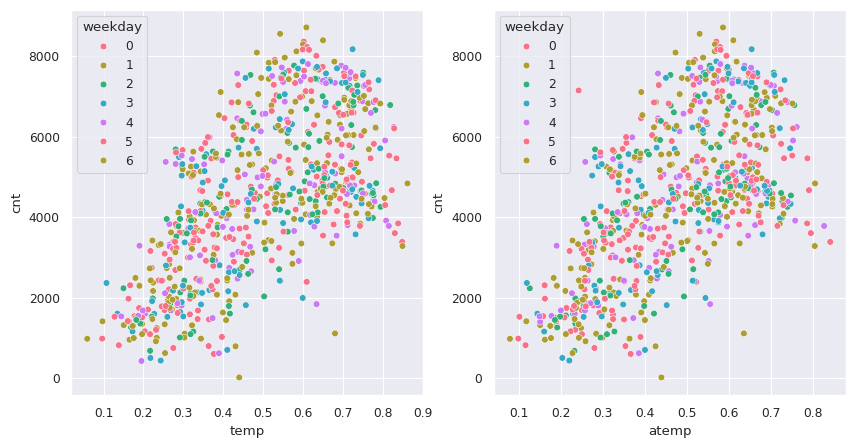

In [10]:
sns.set_context("paper", font_scale=1)
sns.set_style("darkgrid")

custom_palette = sns.color_palette("husl", 5)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
sns.scatterplot(data=data, x='temp', y=target_feature, hue="weekday", palette=custom_palette, ax=axes[0])
sns.scatterplot(data=data, x='atemp', y=target_feature, hue="weekday", palette=custom_palette, ax=axes[1])
plt.show()


Посмотрим на зависимость 'cnt' от влажности и силы ветра:

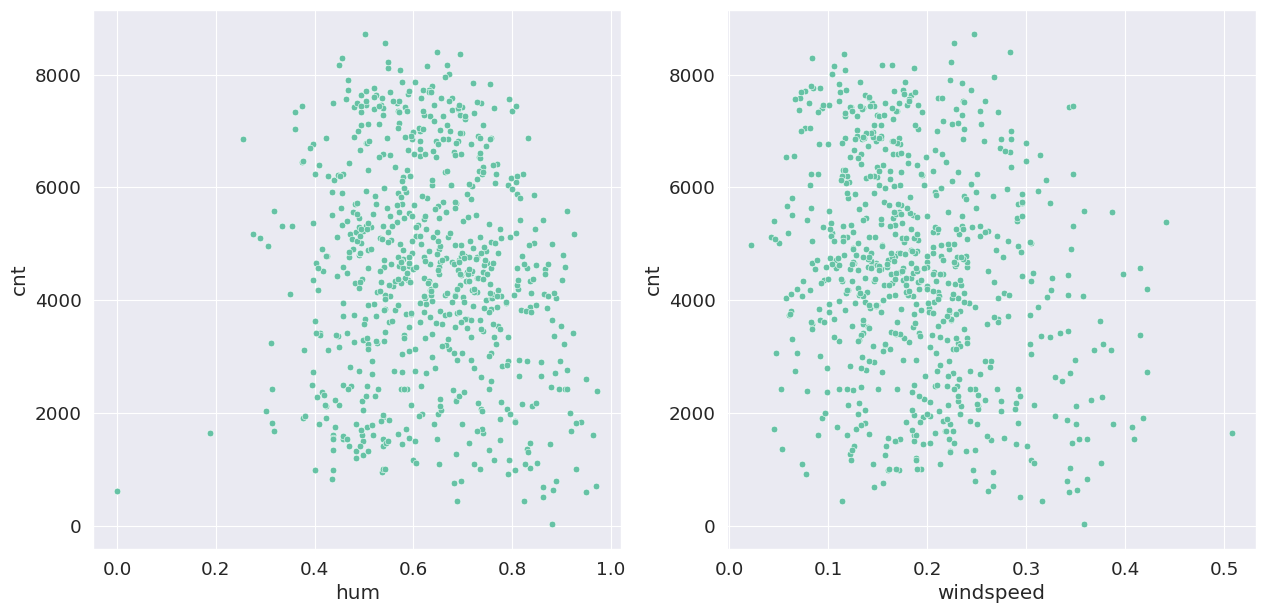

In [11]:
sns.set_context("paper", font_scale=1.5)
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(15, 7))  
sns.scatterplot(data=data, x='hum', y=target_feature, ax=axes[0])
sns.scatterplot(data=data, x='windspeed', y=target_feature, ax=axes[1])
plt.show()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

1) из графиков ясно видна линейная зависимость от времени года: больше всего велосипедов арендуют летом, меньше всего -- зимой
2) люди более склоны арендовать велосипед в теплую погоду, нежели в холодную
3) такая же ситуация касательно общей погодной ситуации дня (больше арендуют в хорошую погоду)
4) влажность и скорость ветра влияют на аренду велосипедов, но не слишком сильно
5) среди рабочих дней нет явной зависимости от конкретного дня недели
6) есть некоторые выбросы по скорости ветра и влажности, однако количество таких выбивающихся точек достаточно мало
7) почти все видимые зависимости от вещественных признаков линейны, поэтому не имеет особого смысла рассматривать нелинейные функции

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** выкинем выбросы

**б).** в категориальных признаках уберем день недели (weekday)

**в).** уберем признаки workingday и holiday

Реализуйте данную процедуру.

In [12]:
train = train[(train['hum'] > 0.2) & (train['windspeed'] < 0.4)]

categorial_features = ['season', 'mnth', 'weathersit'] 
real_features = ['temp', 'atemp', 'hum', 'windspeed'] 

encoder = OneHotEncoder(drop='first', sparse_output=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем

X_train = np.hstack([train[real_features], train_cat])

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [13]:
np.set_printoptions(precision=7, suppress=True)

In [14]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

LinearRegression()

Оценки коэффициентов перед признаками

In [15]:
model.coef_

array([ 7048.5182695,   510.7460338, -3703.8721723, -3531.786097 ,
        1147.9645125,   908.6717796,  1552.5163901,    98.3518427,
         203.3542606,  -542.0905198,  -331.8395488,  -916.789839 ,
       -1341.6547733, -1077.9648701,   166.8121746,    69.5578344,
        -411.4294701,  -111.3278036,  -200.2581069, -1641.1417268])

Оценка свободного коэффициента

In [16]:
model.intercept_

3400.0465456357533

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [17]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

test_preds = model.predict(X_test)

**RMSE**

In [18]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

1300.5730955110537

**MAE**

In [19]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1103.0808350029604

**MAPE**

In [20]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [21]:
mean_absolute_percentage_error(test[target_feature], test_preds)

32.28739057373267

Ошибки на обучающих данных:

In [22]:
train_preds = model.predict(X_train)

metrics.mean_squared_error(train[target_feature], train_preds) ** 0.5, \
metrics.mean_absolute_error(train[target_feature], train_preds), \
mean_absolute_percentage_error(train[target_feature], train_preds)

(1243.9356106230673, 1069.7454418946638, 47.270029759452534)

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [23]:
model.coef_

array([ 7048.5182695,   510.7460338, -3703.8721723, -3531.786097 ,
        1147.9645125,   908.6717796,  1552.5163901,    98.3518427,
         203.3542606,  -542.0905198,  -331.8395488,  -916.789839 ,
       -1341.6547733, -1077.9648701,   166.8121746,    69.5578344,
        -411.4294701,  -111.3278036,  -200.2581069, -1641.1417268])

In [24]:
X = np.hstack([np.ones((X_train.shape[0], 1)), X_train]) # добавляем столбец единиц для свободного члена

Theta = np.linalg.inv(X.T @ X) @ X.T @ train[target_feature]
Theta

array([ 3400.0465456,  7048.5182695,   510.7460338, -3703.8721723,
       -3531.786097 ,  1147.9645125,   908.6717796,  1552.5163901,
          98.3518427,   203.3542606,  -542.0905198,  -331.8395488,
        -916.789839 , -1341.6547733, -1077.9648701,   166.8121746,
          69.5578344,  -411.4294701,  -111.3278036,  -200.2581069,
       -1641.1417268])

In [25]:
m, n = X_test.shape
test_preds =  np.hstack((X_test, np.ones((m, 1)))) @ Theta.reshape(-1, 1)
mean_absolute_percentage_error(test[target_feature], test_preds[:, 0])

62.43040534884518

Проблема может быть связана с тем, что столбцы $X$ могут быть приближенно линейно зависимыми, а значит, матрица $X^TX$ будет близка к вырожденной. Наличие приближенной линейной зависимости может быть связано с тем, что некоторые признаки все же имеют некоторую корреляцию между друг другом. Например, температура воздуха на улице и то, как она ощущается, очевидно связаны друг с другом. 

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Изменим признаки и построим новую модель:

In [26]:
new_real_features = ['temp', 'hum', 'windspeed'] 
new_categorial_features = ['season', 'weekday', 'weathersit'] 

encoder = OneHotEncoder(drop='first', sparse_output=False)  
train_cat = encoder.fit_transform(train[new_categorial_features])  
X_train = np.hstack([train[new_real_features], train_cat])

model = LinearRegression(fit_intercept=True)  
model.fit(X_train, train[target_feature]) 

LinearRegression()

In [27]:
model.coef_

array([ 6541.111665 , -2871.6104167, -3433.6705464,   815.4167573,
         363.4471607,  1451.8671964,   224.4690113,   391.3891156,
         374.7000019,   445.9501318,   432.6682006,   576.703689 ,
        -297.4667126, -1837.2306568])

In [28]:
model.intercept_

2942.6834287415113

In [29]:
test_cat = encoder.transform(test[new_categorial_features])

X_test = np.hstack([test[new_real_features], test_cat])

test_preds = model.predict(X_test)

Посчитаем оценки для полученной модели на тестовой и тренировочной выборках:

In [30]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5, \
metrics.mean_absolute_error(test[target_feature], test_preds), \
mean_absolute_percentage_error(test[target_feature], test_preds)

(1302.2306007533593, 1094.9219037326409, 32.396143502205035)

In [31]:
train_preds = model.predict(X_train)

metrics.mean_squared_error(train[target_feature], train_preds) ** 0.5, \
metrics.mean_absolute_error(train[target_feature], train_preds), \
mean_absolute_percentage_error(train[target_feature], train_preds)

(1280.193174694017, 1097.7830800277386, 46.05283435766194)

In [32]:
X = np.hstack([np.ones((X_train.shape[0], 1)), X_train]) # добавляем столбец единиц для свободного члена
Theta = np.linalg.inv(X.T @ X) @ X.T @ train[target_feature]
Theta

array([ 2942.6834287,  6541.111665 , -2871.6104167, -3433.6705464,
         815.4167573,   363.4471607,  1451.8671964,   224.4690113,
         391.3891156,   374.7000019,   445.9501318,   432.6682006,
         576.703689 ,  -297.4667126, -1837.2306568])

In [33]:
m, n = X_test.shape
test_preds =  np.hstack((X_test, np.ones((m, 1)))) @ Theta.reshape(-1, 1)
mean_absolute_percentage_error(test[target_feature], test_preds[:, 0])

55.191087060516665

Сделайте выводы.

**Выводы:** После удаления зависимого признака точность действительно выросла. Значит, зависимость признаков действительно могла повлиять на показатели модели.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

**1.** 

$F(\theta) = Y^TY-2Y^TX\theta+\theta^TX^TX\theta+\lambda\theta^2$

$\nabla F(\theta) = -2X^TY+2X^TX\theta+2\lambda\theta = 0$

$\Rightarrow \widehat{\theta} = (X^TX+\lambda I)^{-1}X^TY$

Такая оценка действительно помогает избраться от проблем обратимости матрицы $X^TX$: прибавив $\lambda I$ к матрице $X^TX$ мы "отодвинем" собственные значения этой матрицы от $0$. 

**2.** 

рассчет вывода формул аналогичен выводу в первой задаче, получаем

*GD:*

$\theta_{t+1} = \theta_t - \eta X^T(X\theta_t- Y) - \eta\lambda\theta_t = \theta_t - \eta \sum\limits_{i=1}^n(x_i^2\theta_t - x_iY_i)$

*SGD:*

$\theta_{t+1} = \theta_t - \eta (\frac{n}{k}\sum\limits_{i\in I} x_i(x_i^T\theta_t- Y_i) -\lambda\theta_t), \quad$ где $I = \{ i_1, ..., i_k \}$, причем $i_1, ..., i_k \sim U\{1, ..., n\}$

**3.**

Стандартизация позволяет корректнее сравнивать данные, полученные при разных условиях. Мы ко всем данным прибавляем одно и то же число, хотя значения в данных могут сильно отличаться между собой. Поэтому необходимо стандартизовать полученные значения, чтобы сделать их "одного порядка", что позволит проводить более корректный анализ.

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

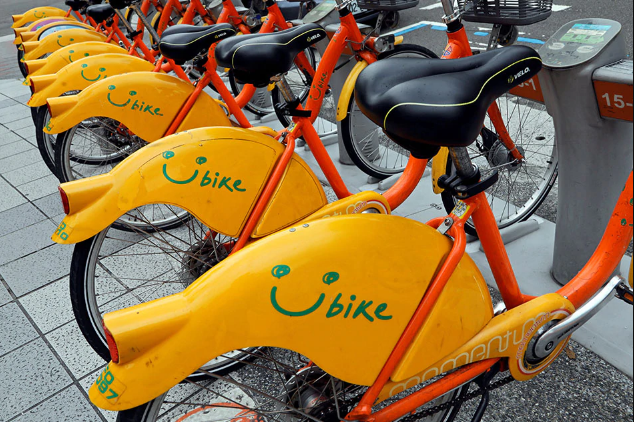

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [34]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.
        n, d = X.shape
        if self.fit_intercept:
            X = np.hstack((X, np.ones((n, 1))))
            d += 1
        self.theta = np.linalg.inv(X.T@X + self.lambd * np.eye(d)) @ X.T @ Y
        
        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        n, d = X.shape
        if self.fit_intercept:
            X = np.hstack((X, np.ones((n, 1))))
            d += 1
        
        # Посчитайте предсказания
        predictions = X @ self.theta 
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [35]:
train4, test4 = train_test_split(data, test_size=0.2)
train4, valid4 = train_test_split(train4, test_size=0.25)
train4.shape, valid4.shape, test4.shape

((438, 11), (146, 11), (147, 11))

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [36]:
real_features4 = ['temp', 'hum', 'windspeed'] 
categorial_features4 = ['season', 'weekday', 'weathersit'] 

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [37]:
train_RMSE = []
train_MAE = []
train_MAPE = []

valid_RMSE = []
valid_MAE = []
valid_MAPE = []

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
models = []
models_zero = []
scaler = MinMaxScaler()
lambdas = np.logspace(-10, 10)

encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train4[categorial_features4])  
train_cat = encoder.fit_transform(train4[categorial_features4])  
X_train4 = np.hstack([train4[real_features4], train_cat])

valid_cat = encoder.transform(valid4[categorial_features4])
X_valid4 = np.hstack([valid4[real_features4], valid_cat])

test_cat = encoder.transform(test4[categorial_features4])
X_test4 = np.hstack([test4[real_features4], test_cat])

train_cat = scaler.fit_transform(train_cat) # стандартизация данных
valid_cat = scaler.transform(valid_cat)
test_cat = scaler.transform(test_cat)

for i, lambd in enumerate(lambdas):
    models.append(RidgeRegression(lambd=lambd, fit_intercept=True)) 
    models[i].fit(X_train4, train4[target_feature])
    
    train_preds = models[i].predict(X_train4)
    train_RMSE.append(metrics.mean_squared_error(train4[target_feature], train_preds) ** 0.5)
    train_MAE.append(metrics.mean_absolute_error(train4[target_feature], train_preds))
    train_MAPE.append(mean_absolute_percentage_error(train4[target_feature], train_preds))

    valid_preds = models[i].predict(X_valid4)
    valid_RMSE.append(metrics.mean_squared_error(valid4[target_feature], valid_preds) ** 0.5)
    valid_MAE.append(metrics.mean_absolute_error(valid4[target_feature], valid_preds))
    valid_MAPE.append(mean_absolute_percentage_error(valid4[target_feature], valid_preds))

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

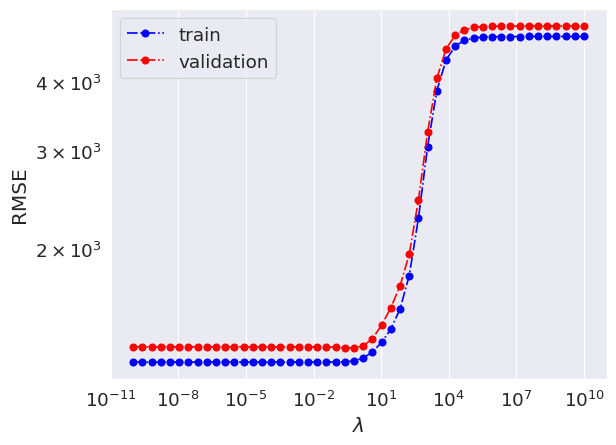

In [39]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(lambdas, train_RMSE, marker="o",color='blue', linestyle='-.')
    plt.plot(lambdas, valid_RMSE, marker="o",color='red', linestyle='-.')
    plt.xlabel('$\\lambda$')
    plt.ylabel('RMSE')
    plt.legend(['train', 'validation', 'test'])

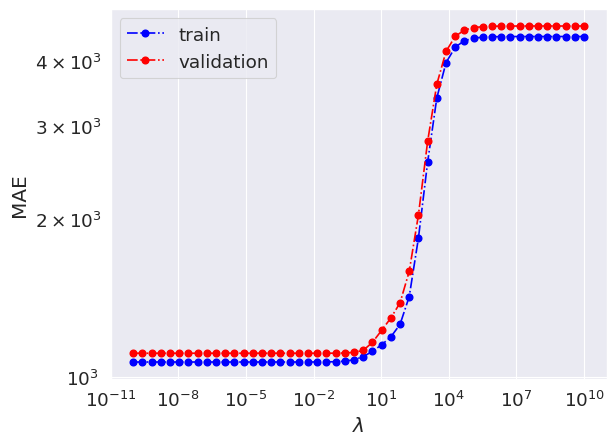

In [40]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(lambdas, train_MAE, marker="o",color='blue', linestyle='-.')
    plt.plot(lambdas, valid_MAE, marker="o",color='red', linestyle='-.')
    plt.xlabel('$\\lambda$')
    plt.ylabel('MAE')
    plt.legend(['train', 'validation', 'test'])

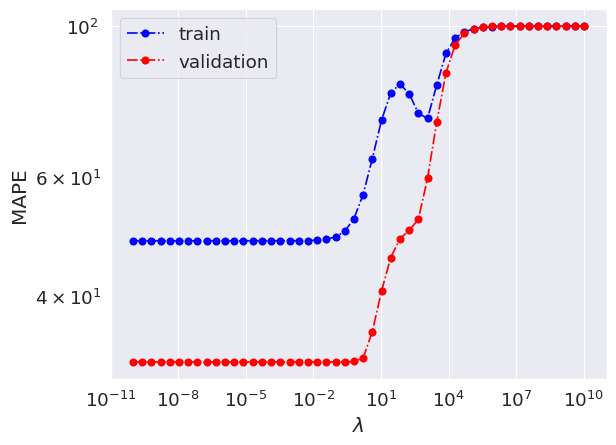

In [41]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(lambdas, train_MAPE, marker="o",color='blue', linestyle='-.')
    plt.plot(lambdas, valid_MAPE, marker="o",color='red', linestyle='-.')
    plt.xlabel('$\\lambda$')
    plt.ylabel('MAPE')
    plt.legend(['train', 'validation', 'test'])

Из графиков получаем, что оценки RMSE и MAE на тренировочной выборке лучше, чем на валидационной, а на оценке MAPE, наоборот, у тренировочной результат хуже, чем у валидационной. 

В качестве объяснения этого можно предположить, что это случилось из-за переобучения. 

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

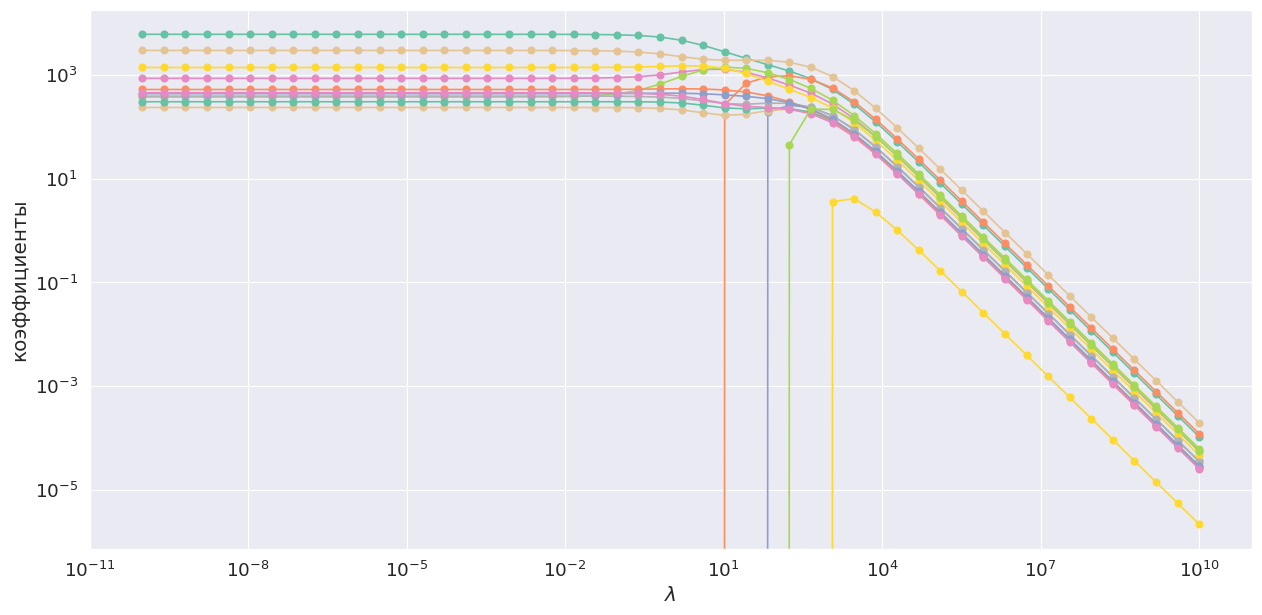

In [42]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.figure(figsize=(15, 7))
    plt.xscale('log')
    plt.yscale('log')
    
    for i in range(models[0].theta.size):
        plt.plot(lambdas, [model.theta[i] for model in models], marker='o')
    plt.xlabel('$\\lambda$')
    plt.ylabel('коэффициенты')

Из графика мы видим, что, чем больше $\lambda$, тем меньшее значения принимают коэффициенты. Но также появляются коэффициенты, которые до определенных $\lambda$ значений были нулевыми. Можно предположить, что снижение значения коэффициентов при увеличении $\lambda$ непосредственно связано со слагаемым $\lambda \| \theta \|^2$

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Заметим, что наиболее стабильные показатели на графиках оценок и коэффициентов были при $\lambda \in (10^{-11}, 10^{-1})$. Поэтому выберем в качестве гиперпараметра $\lambda = 10^{-3}$, лежащую в этом промежутке.

In [43]:
model = RidgeRegression(lambd=10**(-3), fit_intercept=True)
model.fit(X_train, train[target_feature])
test_preds = model.predict(X_test4)
metrics.mean_squared_error(test4[target_feature], test_preds) ** 0.5, metrics.mean_absolute_error(test4[target_feature], test_preds), mean_absolute_percentage_error(test4[target_feature], test_preds)

(1339.6891976122251, 1160.8407895875027, 35.29547312777993)

Сделайте выводы.

Мы получили оценки, сравнимые с теми, что мы получили в предыдущем пункте. По в некоторых оценках этот способ демонстрирует себя даже лучше, выдавая меньшие ошибки.

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

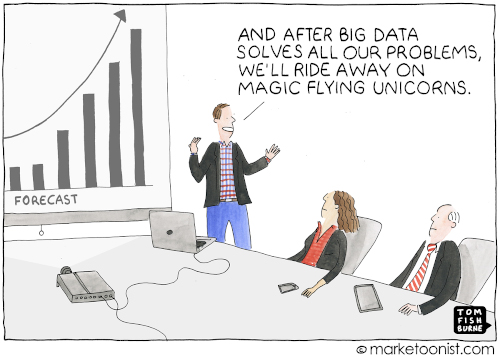

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [44]:
coef = np.zeros(X_train4.shape[1] + 1)

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

$\theta_{t+1} = \theta_t - \eta (\frac{n}{k}\sum\limits_{i\in I} x_i(x_i^T\theta_t- Y_i) - \lambda\theta_t), \quad$ где $I = \{ i_1, ..., i_k \}$, причем $i_1, ..., i_k \sim U\{1, ..., n\}$

In [45]:
train4, test4 = train_test_split(data, test_size=0.2)
train4, valid4 = train_test_split(train4, test_size=0.25)

encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train4[categorial_features4])  
X_train4 = np.hstack([train4[real_features4], train_cat])

valid_cat = encoder.transform(valid4[categorial_features4])
X_valid4 = np.hstack([valid4[real_features4], valid_cat])

test_cat = encoder.transform(test4[categorial_features4])
X_test4 = np.hstack([test4[real_features4], test_cat])

train_cat = scaler.fit_transform(train_cat) # стандартизация данных
valid_cat = scaler.transform(valid_cat)
test_cat = scaler.transform(test_cat)

In [46]:
def update(theta_old, X_old, Y_old, lambd, batch, eta):
    '''
    Итерация градиентного спуска

    theta_old -- коэффициенты, которые мы обновляем (numpy-вектор)
    X -- матрица признаков (numpy-матрица)
    Y -- матрица целевого признака (numpy-матрица)
    lambd -- гиперпараметр из модели Ridge-регрессии
    batch -- размер батча
    eta -- шаг градиентного спуска

    на выходе получаем
    theta -- обновленные значения коэффициентов (numpy-вектор)
    '''
    
    n, d = X_old.shape
    I = np.random.choice(n, size=batch, replace=False)
    X =  np.hstack((X_old[I], np.ones((batch, 1))))
    Y = Y_old.iloc[I]
    theta = theta_old - eta / batch * (X.T @ X @theta_old - X.T @ Y) - eta * lambd * np.eye(d+1) @ theta_old
    return theta

In [47]:
shape = X_train.shape[1]
theta = np.zeros(shape + 1)

n, d = X_train4.shape

RMSE = []
MAE = []
MAPE = []

vRMSE = []
vMAE = []
vMAPE = []

for i in range(2000):
    theta = update(theta, X_train4, train4['cnt'], 10 ** 0.7, 256, 0.1)

    train4_preds = np.hstack((X_train4, np.ones((n, 1)))) @ theta
    RMSE.append(metrics.mean_squared_error(train4[target_feature], train4_preds) ** 0.5)
    MAE.append(metrics.mean_absolute_error(train4[target_feature], train4_preds))
    MAPE.append(mean_absolute_percentage_error(train4[target_feature], train4_preds))

    valid4_preds = np.hstack((X_valid4, np.ones((X_valid4.shape[0], 1)))) @ theta
    vRMSE.append(metrics.mean_squared_error(valid4[target_feature], valid4_preds) ** 0.5)
    vMAE.append(metrics.mean_absolute_error(valid4[target_feature], valid4_preds))
    vMAPE.append(mean_absolute_percentage_error(valid4[target_feature], valid4_preds))

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

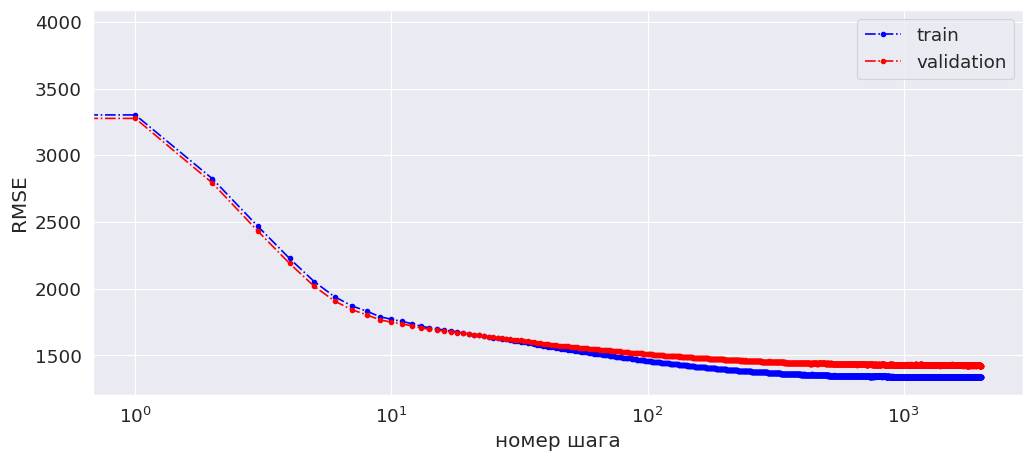

In [48]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(RMSE)), RMSE, marker="o",color='blue', linestyle='-.', markersize=3)
    plt.plot(range(len(RMSE)), vRMSE, marker="o",color='red', linestyle='-.', markersize=3)
    plt.xlabel('номер шага')
    plt.ylabel('RMSE')
    plt.legend(['train', 'validation'])
    plt.xscale('log')

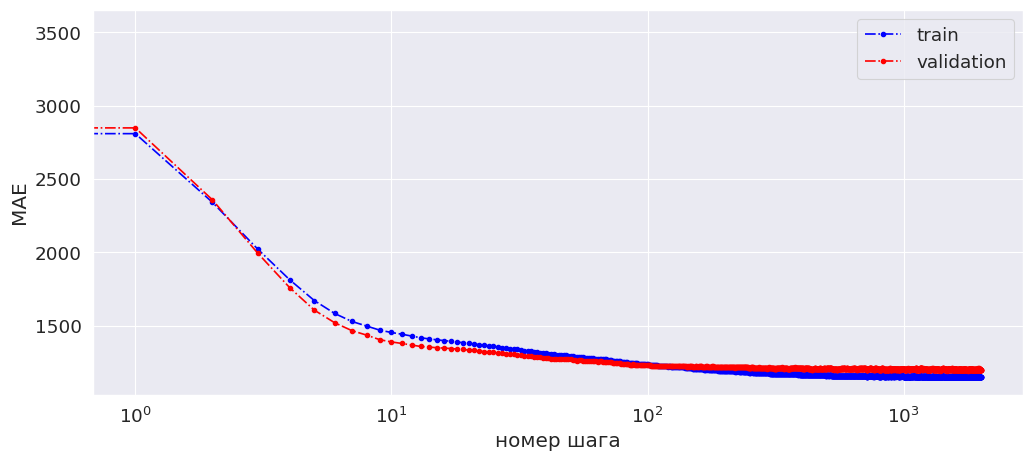

In [49]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(RMSE)), MAE, marker="o",color='blue', linestyle='-.', markersize=3)
    plt.plot(range(len(RMSE)), vMAE, marker="o",color='red', linestyle='-.', markersize=3)
    plt.xlabel('номер шага')
    plt.ylabel('MAE')
    plt.legend(['train', 'validation'])
    plt.xscale('log')

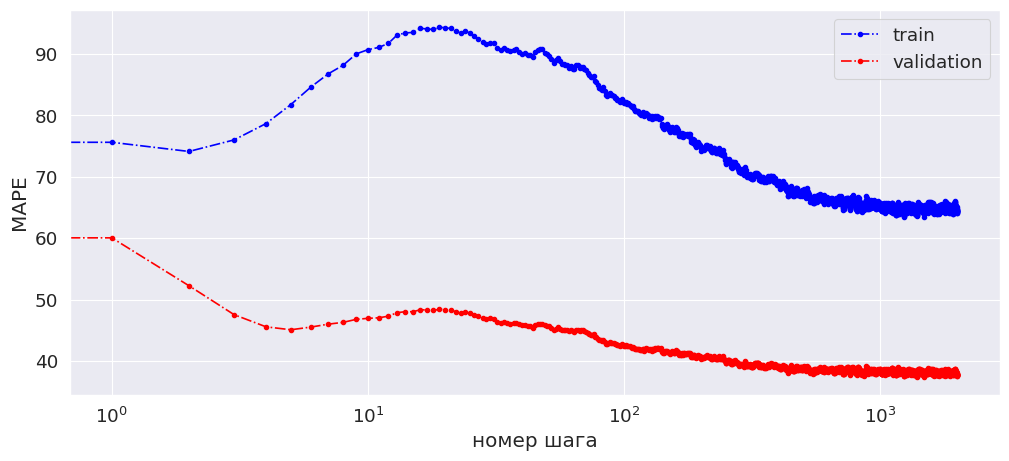

In [50]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(RMSE)), MAPE, marker="o",color='blue', linestyle='-.', markersize=3)
    plt.plot(range(len(RMSE)), vMAPE, marker="o",color='red', linestyle='-.', markersize=3)
    plt.xlabel('номер шага')
    plt.ylabel('MAPE')
    plt.legend(['train', 'validation'])
    plt.xscale('log')

В логарифмических осях мы получаем, что оценки ошибок уменьшаются почти линейно, значит, для сходимости необходимо совершить экспонециальное количество итераций.

Посчитайте ошибку на тестовой выборке.

In [51]:
test4_preds = np.hstack((X_test4, np.ones((X_test4.shape[0], 1)))) @ theta
metrics.mean_squared_error(test4[target_feature], test4_preds) ** 0.5, metrics.mean_absolute_error(test4[target_feature], test4_preds), mean_absolute_percentage_error(test4[target_feature], test4_preds)

(1449.3968119079193, 1209.2065385670621, 34.272275979275854)

Сделайте выводы.

Нам удалось получить с помощью SGD точность, сравнимую с точностью ridge-регрессии, полученной в предыдущем пункте. 